Problem Statement :-
    
The objective of this project is to build and compare multiple machine learning algorithms for the classification of round-winners in the game CS-GO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r"C:\Users\sharm\OneDrive\Desktop\Data Science\Python\Python_projects\CS-GO\csgo_round_snapshots.csv")

In [3]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [5]:
data['map'].value_counts()

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

In [6]:
data['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

In [7]:
#to check the percentage of the games played for each map

map_counts = data['map'].value_counts()
total = map_counts.sum()
percent = map_counts/total * 100
percent

de_inferno     19.451842
de_dust2       18.090025
de_nuke        15.542031
de_mirage      15.175231
de_overpass    11.503145
de_train       11.021158
de_vertigo      9.098113
de_cache        0.118454
Name: map, dtype: float64

In [8]:
map_counts.index

Index(['de_inferno', 'de_dust2', 'de_nuke', 'de_mirage', 'de_overpass',
       'de_train', 'de_vertigo', 'de_cache'],
      dtype='object')

In [9]:
map_counts.values

array([23811, 22144, 19025, 18576, 14081, 13491, 11137,   145],
      dtype=int64)

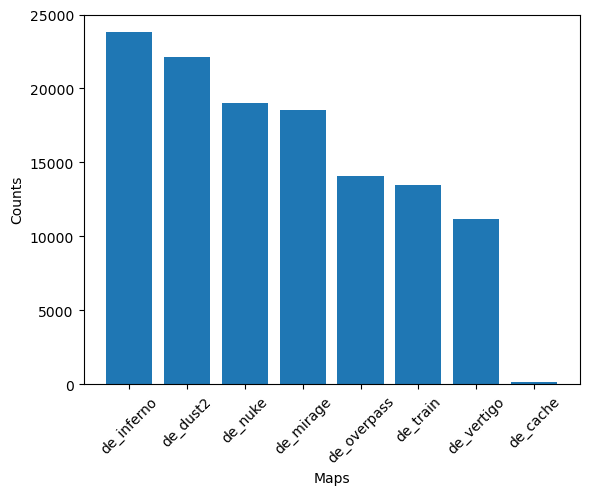

In [10]:
plt.bar(map_counts.index , map_counts.values)
plt.xlabel('Maps', )
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

In [11]:
# Check how many times the Bomb was planted
data['bomb_planted'].value_counts()

False    108726
True      13684
Name: bomb_planted, dtype: int64

Feature Engineering

In [12]:
le = LabelEncoder()

data['map'] = le.fit_transform(data['map'])
data['bomb_planted'] = le.fit_transform(data['bomb_planted'])
data['round_winner'] = le.fit_transform(data['round_winner'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int32  
 4   bomb_planted                  122410 non-null  int64  
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [14]:
data.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,114.97,1.0,0.0,1,0,500.0,500.0,500.0,0.0,1750.0,...,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6,94.97,1.0,0.0,1,0,295.0,111.0,296.0,0.0,1700.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,74.97,1.0,0.0,1,0,295.0,111.0,296.0,0.0,1700.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,54.97,1.0,0.0,1,0,249.0,89.0,269.0,0.0,2300.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,174.97,2.0,0.0,1,0,500.0,500.0,196.0,0.0,19800.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
X = data.drop(columns = ['round_winner'])
Y = data['round_winner']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [17]:
# Scaling the Data

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Discriminant Analysis

In [18]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [19]:
#X_test = lda.transform(X_test)

In [20]:
#X_test

In [21]:
lda.coef_

array([[ 1.30559812e-01, -3.14455896e-02,  1.50475417e-02,
        -8.42410046e-02,  2.36716042e-01, -4.48850667e-01,
         3.25168787e-01, -5.37862833e-01,  5.47944239e-01,
        -1.97892035e-01,  1.61783075e-01,  2.35135284e-02,
         1.45289572e-01, -2.43811893e-02, -2.11659153e-01,
         2.74599933e-01, -1.95027954e-01,  5.87253158e-01,
        -2.09743027e-01,  3.58033848e-02, -3.13035248e-01,
         2.45579553e-01, -3.67910935e-16,  1.21307477e-03,
         9.12829292e-03,  3.58274380e-02, -1.12905369e-02,
         1.04469064e-02, -1.40656226e-01,  3.99808121e-02,
        -7.28785512e-16,  1.77376189e-02, -5.24912013e-02,
         1.24542767e-01,  1.93850102e-02, -2.93766803e-02,
         2.87888101e-16, -7.75902677e-17, -9.74835819e-02,
         4.69121756e-02, -4.71147741e-01,  1.02457028e-01,
        -1.76477685e-02,  1.11251621e-01, -1.11581465e-02,
         7.72190862e-03, -1.41311477e-02,  3.69342166e-02,
         1.24919316e-02, -4.18976528e-03, -1.23705784e-0

In [22]:
lda_coef = np.exp(np.abs(lda.coef_))

In [23]:
lda_coef = lda_coef.flatten()

In [24]:
lda_coef

array([1.13946609, 1.03194523, 1.01516133, 1.08789105, 1.26708127,
       1.56651071, 1.38426427, 1.71234339, 1.72969352, 1.2188308 ,
       1.1756052 , 1.02379215, 1.15637438, 1.02468084, 1.23572662,
       1.31600408, 1.21534496, 1.79903994, 1.23336108, 1.03645204,
       1.36756973, 1.27836198, 1.        , 1.00121381, 1.00917008,
       1.03647697, 1.01135452, 1.01050167, 1.15102889, 1.0407908 ,
       1.        , 1.01789586, 1.05389329, 1.13263046, 1.01957412,
       1.02981243, 1.        , 1.        , 1.10239334, 1.04802996,
       1.60183163, 1.10788969, 1.01780441, 1.1176761 , 1.01122063,
       1.0077518 , 1.01423146, 1.03762476, 1.01257028, 1.00419855,
       1.13168286, 1.03206734, 1.        , 1.        , 1.01014156,
       1.01698108, 1.01741622, 1.0191547 , 1.        , 1.00592146,
       1.        , 1.01646739, 1.00985612, 1.01177566, 1.24521568,
       1.71455028, 1.08298159, 1.02459274, 1.04562505, 1.07453707,
       1.0214851 , 1.00114195, 1.02365435, 1.05748223, 1.04183

In [25]:
num_features = len(lda_coef)

In [26]:
feature_idx = np.arange(num_features)
feature_idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [27]:
feature_nn = list(X.columns)

In [28]:
type(feature_nn)

list

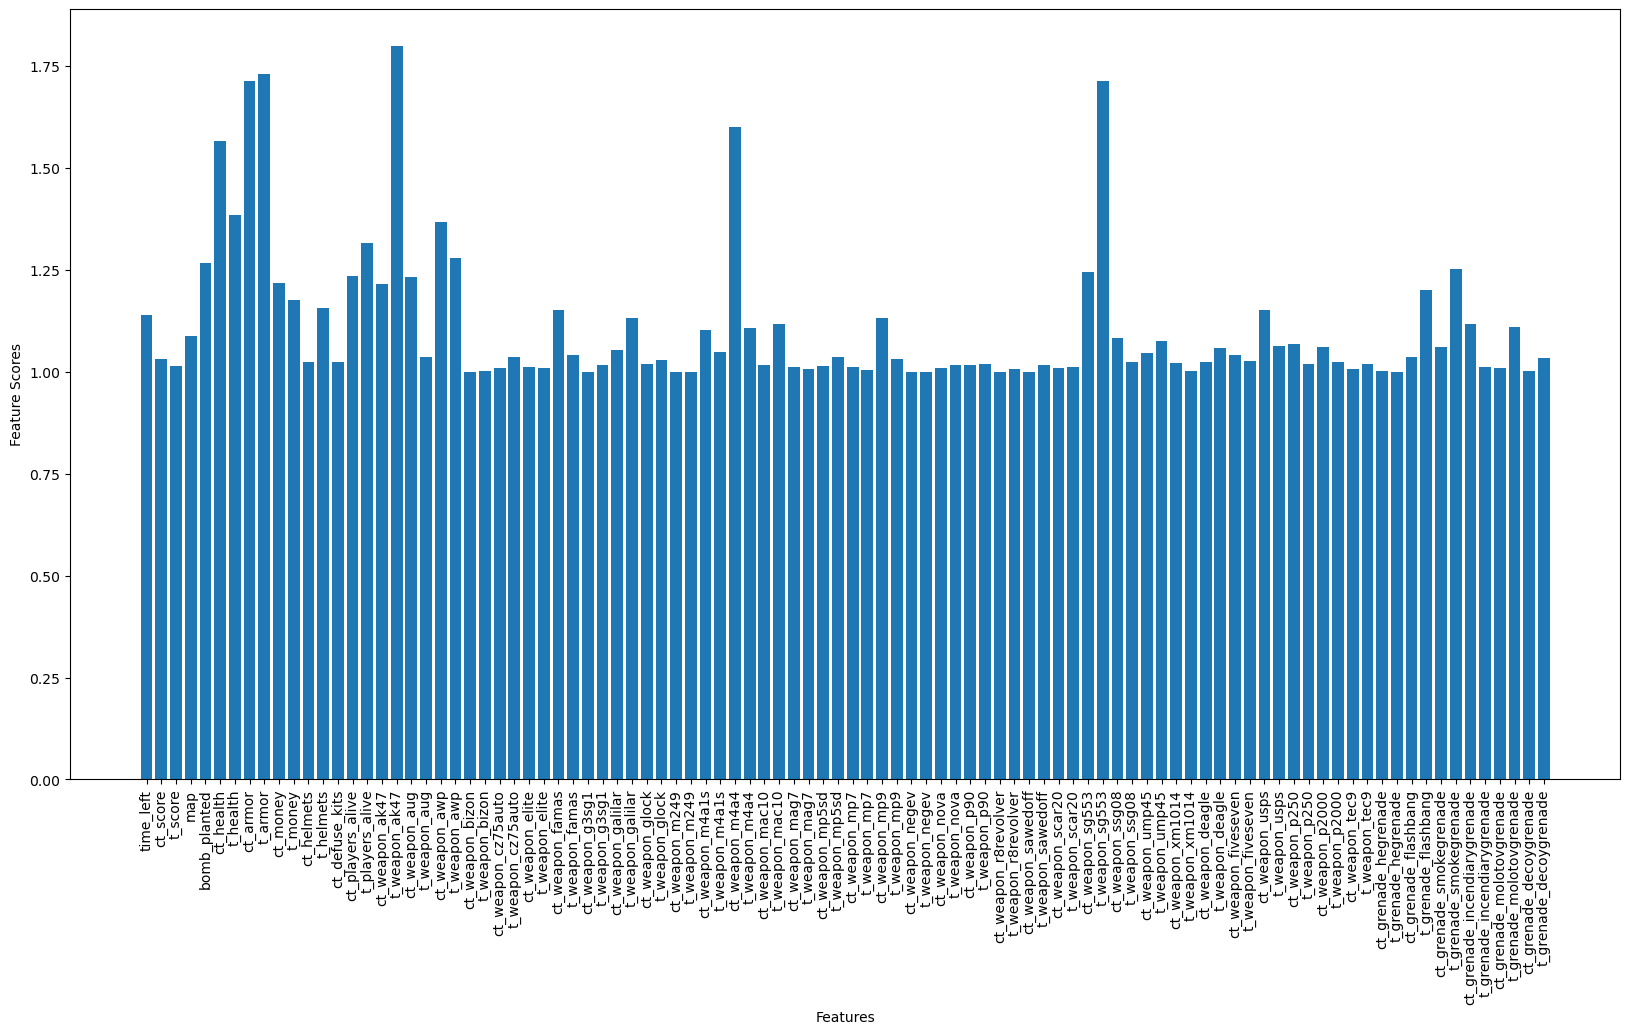

In [29]:
plt.figure(figsize = (20,10))
plt.bar(feature_idx, lda_coef)
plt.xticks(feature_idx, feature_nn, rotation = 90)
plt.xlabel('Features')
plt.ylabel("Feature Scores")
plt.show()

In [30]:
data_feature_score = pd.DataFrame({'featur_names' : feature_nn, 'feature_score' : lda_coef})
data_feature_score

,featur_names,feature_score
0,time_left,1.139466
1,ct_score,1.031945
2,t_score,1.015161
3,map,1.087891
4,bomb_planted,1.267081
...,...,...
91,t_grenade_incendiarygrenade,1.011283
92,ct_grenade_molotovgrenade,1.010506
93,t_grenade_molotovgrenade,1.109282
94,ct_grenade_decoygrenade,1.002167


In [31]:
#take top 20 features
top_20_features = data_feature_score.nlargest(20, 'feature_score')
top_20_features

,featur_names,feature_score
17,t_weapon_ak47,1.799040
8,t_armor,1.729694
65,t_weapon_sg553,1.714550
7,ct_armor,1.712343
40,ct_weapon_m4a4,1.601832
5,ct_health,1.566511
6,t_health,1.384264
20,ct_weapon_awp,1.367570
15,t_players_alive,1.316004
21,t_weapon_awp,1.278362


In [32]:
top_20_idx = list(top_20_features.index)
top_20_idx

[17, 8, 65, 7, 40, 5, 6, 20, 15, 21, 4, 89, 64, 14, 18, 9, 16, 87, 10, 12]

In [33]:
X_train = X_train[:, top_20_idx] #Extracting top 20 features from Train data
X_train

array([[-0.91244882, -0.56503467, -0.72451197, ...,  0.07888126,
        -0.89452158, -1.38002452],
       [-0.17779653,  0.87857661,  1.90362303, ...,  1.75246063,
        -0.12794254,  1.10667269],
       [-0.91244882, -1.71075792, -0.72451197, ..., -1.03683831,
         0.53560168, -1.38002452],
       ...,
       [-0.91244882, -1.71075792, -0.72451197, ..., -1.03683831,
        -0.22685597, -1.38002452],
       [ 2.02616031,  1.15355019, -0.72451197, ...,  1.19460084,
        -0.68845195,  0.11199381],
       [-0.91244882, -1.71075792, -0.72451197, ..., -1.03683831,
        -0.59365992, -1.38002452]])

In [34]:
X_test = X_test[:, top_20_idx] #Extracting top 20 features from Test Data
X_test

array([[ 1.29150803,  1.02752063, -0.72451197, ...,  0.63674105,
         0.54384446,  1.10667269],
       [ 0.55685575,  1.07907818,  1.02757803, ...,  1.75246063,
         0.17291912,  1.10667269],
       [-0.91244882, -1.71075792, -0.72451197, ..., -1.03683831,
         0.3542604 , -1.38002452],
       ...,
       [-0.91244882, -0.59367775,  1.02757803, ..., -0.47897852,
        -0.87391462, -0.88268508],
       [-0.91244882, -0.18121739,  0.15153303, ..., -1.03683831,
        -0.33401218, -0.38534564],
       [-0.91244882, -0.94885196,  0.15153303, ..., -1.03683831,
         0.9765907 , -0.38534564]])

# Logistic Regression

In [35]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [37]:
ac = accuracy_score(Y_test, y_pred)
ac

0.7481823380442775

# Decision Tree Classifier

In [38]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dtc.predict(X_test)

In [40]:
ac = accuracy_score(Y_test, y_pred)
ac

0.8113716199656891

# Random Forest Classifier

In [41]:
rfc = RandomForestClassifier()

rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
ac = accuracy_score(Y_test, y_pred)
ac

0.8522179560493424